<a href="https://colab.research.google.com/github/canon14/MovieRecommendationModel/blob/main/MovieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from scipy.stats import gaussian_kde

%matplotlib inline

In [186]:
# Create dataframes for all the files
# artist_attributes_df = pd.read_csv('/content/artist_attributes.csv')
# artist_to_imdb_df = pd.read_csv('/content/artist_to_imdb.csv')
# imdb_attributes_df = pd.read_csv('/content/imdb_attributes.csv')
# imdb_genres_df = pd.read_csv('/content/imdb_genres.csv')
# links_df = pd.read_csv('/content/links.csv')
# movie_genres_df = pd.read_csv('/content/movie_genres.csv')
# movie_title_keywords_df = pd.read_csv('/content/movie_title_keywords.csv')
# movies_df = pd.read_csv('/content/movies.csv')
tmdb_attributes_df = pd.read_csv('/content/tmdb_attributes.csv')
tmdb_genres_df = pd.read_csv('/content/tmdb_genres.csv')
tmdb_keywords_df = pd.read_csv('/content/tmdb_keywords.csv')
tmdb_overview_keywords_df = pd.read_csv('/content/tmdb_overview_keywords.csv')

In [187]:
# ratings_df = pd.read_csv('/content/ratings.csv')

In [188]:
# #Check total num of rows for each dataframe
# df_names = [artist_attributes_df, artist_to_imdb_df, imdb_attributes_df, imdb_genres_df, links_df, movie_genres_df, movie_title_keywords_df, movies_df, ratings_df, tmdb_attributes_df, tmdb_keywords_df, tmdb_overview_keywords_df]
# names = ['artist_attributes_df', 'artist_to_imdb_df', 'imdb_attributes_df', 'imdb_genres_df', 'links_df', 'movie_genres_df', 'movie_title_keywords_df', 'movies_df', 'ratings_df', 'tmdb_attributes_df', 'tmdb_keywords_df', 'tmdb_overview_keywords_df']

# for i in range(0, len(df_names)):
#   print(f'{names[i]} : {len(df_names[i])}')
#   print(f'{names[i]} columns: {df_names[i].columns}')
#   print('--------------------------------------------')


#**Data Exploration and Cleaning/Transformation**

###**Artist**

In [189]:
# #Artist 
# artist_attributes_df.head()

In [190]:
# artist_attributes_df.describe()

There are 175719 unique artists but only 173131 names..Some names might be duplicated in this dataset

In [191]:
# #Check for duplicate names
# artist_attributes_df.value_counts('name')

In [192]:
# #Should we remove these duplicates? The problem is these names also have unique artist_id, this means that different movies starred by these artists might be using different artist_id for the same artist
# #It is safe to just keep them for now
# artist_attributes_df[artist_attributes_df['name'] == 'Dinesh']

###**IMDB**

In [193]:
# imdb_attributes_df = pd.read_csv('/content/imdb_attributes.csv')

In [194]:
# imdb_attributes_df.describe()

In [195]:
# imdb_attributes_df.head(10)

In [196]:
# imdb_attributes_df.info()

In [197]:
# #Transform datatypes 
# #We are using errors='coerce' in case if there is any junk data, meaning any data that is not its respective type.. it will be replaced by NaN/Null
# def transform_numeric_datatypes(df, cols):
#   for col in cols:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# def transform_int_datatypes(df, cols):
#   for col in cols:
#     df[col] = df[col].astype('Int64')

# def transform_str_datatypes(df, cols):
#   for col in cols:
#     df[col] =  df[col].astype(str)

# def transform_date_datatypes(df, cols):
#   for col in cols:
#     df[col] = pd.to_datetime(df[col], errors='coerce')

A lot of these values do not make sense (e.g. max year = 276637, max nrOfWins = 7620, etc). We will have to clean the data for further analysis. Let's investigate some of these columns.

In [198]:
# #Convert datatypes for columns
# transform_numeric_datatypes(imdb_attributes_df, ['imdbRating', 'duration', 'year', 'nrOfWins', 'nrOfNominations'])
# transform_str_datatypes(imdb_attributes_df, ['title'])

# #drop rows where year is less than 1900 and more than 2022
# imdb_attributes_df = imdb_attributes_df[(imdb_attributes_df['year'] > 1900) & (imdb_attributes_df['year'] < 2023)]

# #drop rows where nrOfWins is more than 100 
# imdb_attributes_df = imdb_attributes_df[imdb_attributes_df['nrOfWins'] <= 100]

# # drop rows if not Movie, TV Series, TV Mini-Series, or TV Episode 
# imdb_attributes_df = imdb_attributes_df[~imdb_attributes_df.title.str.contains('|'.join(['Video', 'Video Game']))]

# #create a new column called 'category' to store title category
# imdb_attributes_df['category'] = ""

# #Parse strings to define title category
# for index,data in enumerate(imdb_attributes_df['title']):
#     if "TV Episode" in data:
#       imdb_attributes_df['category'][index] = 'TV Episode'
#     elif "TV Series" in data:
#       imdb_attributes_df['category'][index] = 'TV Series'
#     elif "TV Mini-Series" in data:
#       imdb_attributes_df['category'][index] = 'TV Mini-Series'
#     else:
#       imdb_attributes_df['category'][index] = 'Movie'

# #Split title to only keep the title (excluding title category and year released)
# imdb_attributes_df['title'] = imdb_attributes_df['title'].apply(lambda x: x.split(' (')[0])

# #Check average duration value for each category to fill duration missing value
# imdb_attributes_df.groupby('category').mean('imdbRating')
# imdb_attributes_df['duration'] = imdb_attributes_df['duration'].fillna(round(imdb_attributes_df['duration'].mean()))

# #Drop rows where imdbRating is NULL since these are mostly episodes of TV Episode/Series/Mini-Series
# imdb_attributes_df = imdb_attributes_df[imdb_attributes_df['imdbRating'].notnull()]

# #transform datatypes final
# transform_int_datatypes(imdb_attributes_df, ['duration', 'year', 'nrOfWins', 'nrOfNominations'])


In [199]:
# #Check the cleaned and transformed datasets
# imdb_attributes_df.head()

In [200]:
# imdb_attributes_df.info()

In [201]:
# imdb_attributes_df.describe()

In [202]:
# imdb_attributes_df.to_csv('imdb_attributes_cleaned.csv', index = False)

#**TMDB**

In [232]:
tmdb_attributes_df = pd.read_csv('/content/tmdb_attributes.csv')
tmdb_genres_df = pd.read_csv('/content/tmdb_genres.csv')
tmdb_keywords_df = pd.read_csv('/content/tmdb_keywords.csv')
tmdb_overview_keywords_df = pd.read_csv('/content/tmdb_overview_keywords.csv')

In [233]:
tmdb_genres_df.head()

,Unnamed: 0,genre,movieID,title
0,0,Action,19995,Avatar
1,1,Adventure,19995,Avatar
2,2,Fantasy,19995,Avatar
3,3,SciFi,19995,Avatar
4,4,Adventure,285,Pirates of the Caribbean: At World's End


##Data Cleaning, Transformation, and Exploration

In [234]:
#Create separate dataframes to group genres (genre count and lists)
#Genre Count
genre_count_df = tmdb_genres_df.groupby(['title', 'movieID'],as_index=False).count().rename(columns={'genre' : 'genre_counts'})
genre_count_df = genre_count_df.drop('Unnamed: 0', axis=1)

#Group Genre into lists 
genre_lists_df = tmdb_genres_df.groupby(['title', 'movieID'])['genre'].apply(list).reset_index(name='genres')

In [235]:
#Join all the created dataframes into tmdb_attributes
genre_count_lists_df = genre_lists_df.merge(genre_count_df, how='inner', on=['title', 'movieID'])

tmdb_attributes_df = tmdb_attributes_df.merge(genre_count_lists_df, how='inner', left_on='id', right_on='movieID')

#rename and drop columns
tmdb_attributes_df = tmdb_attributes_df.drop(['title_x', 'title_y', 'movieID'], axis=1).rename(columns={'id': 'movie_id', 'original_title':'title'})

#create a new column to store genres information in string and not list
tmdb_attributes_df['genre_string'] = [', '.join(map(str, l)) for l in tmdb_attributes_df['genres']]

#fill empty value for runtime with the mean (since we only have 2 missing values)
tmdb_attributes_df['runtime'] = tmdb_attributes_df['runtime'].fillna(tmdb_attributes_df['runtime'].mean())

# changing the release_date format
tmdb_attributes_df['release_date'] = pd.to_datetime(tmdb_attributes_df['release_date'])

In [236]:
tmdb_attributes_df

,budget,movie_id,original_language,title,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,genres,genre_counts,genre_string
0,237000000,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[Action, Adventure, Fantasy, SciFi]",4,"Action, Adventure, Fantasy, SciFi"
1,300000000,285,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[Adventure, Fantasy, Action]",3,"Adventure, Fantasy, Action"
2,245000000,206647,en,Spectre,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[Action, Adventure, Crime]",3,"Action, Adventure, Crime"
3,250000000,49026,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[Action, Crime, Drama, Thriller]",4,"Action, Crime, Drama, Thriller"
4,260000000,49529,en,John Carter,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[Action, Adventure, SciFi]",3,"Action, Adventure, SciFi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,0,67238,en,Cavite,0.022173,2005-03-12,0,80.0,NaN,7.5,2,"[Foreign, Thriller]",2,"Foreign, Thriller"
4771,220000,9367,es,El Mariachi,14.269792,1992-09-04,2040920,81.0,"He didn't come looking for trouble, but troubl...",6.6,238,"[Action, Crime, Thriller]",3,"Action, Crime, Thriller"
4772,9000,72766,en,Newlyweds,0.642552,2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,5.9,5,"[Comedy, Romance]",2,"Comedy, Romance"
4773,0,231617,en,"Signed, Sealed, Delivered",1.444476,2013-10-13,0,120.0,NaN,7.0,6,"[Comedy, Drama, Romance, TV Movie]",4,"Comedy, Drama, Romance, TV Movie"


In [237]:
tmdb_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4775 entries, 0 to 4774
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             4775 non-null   int64         
 1   movie_id           4775 non-null   int64         
 2   original_language  4775 non-null   object        
 3   title              4775 non-null   object        
 4   popularity         4775 non-null   float64       
 5   release_date       4775 non-null   datetime64[ns]
 6   revenue            4775 non-null   int64         
 7   runtime            4775 non-null   float64       
 8   tagline            3956 non-null   object        
 9   vote_average       4775 non-null   float64       
 10  vote_count         4775 non-null   int64         
 11  genres             4775 non-null   object        
 12  genre_counts       4775 non-null   int64         
 13  genre_string       4775 non-null   object        
dtypes: datet

In [209]:
#Generate the summary statistics for the data
tmdb_attributes_df.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,genre_counts
count,4.775000e+03,4775.000000,4775.000000,4.775000e+03,4775.000000,4775.000000,4775.000000,4775.000000
mean,2.921458e+07,55988.208796,21.617344,8.274265e+07,107.207207,6.114199,694.257382,2.546597
std,4.078120e+07,87310.177303,31.867749,1.632119e+08,21.956016,1.140636,1237.070089,1.107292
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,9.500000e+05,8998.500000,4.806600,0.000000e+00,94.000000,5.600000,55.000000,2.000000
50%,1.500000e+07,14536.000000,13.119133,1.947206e+07,104.000000,6.200000,238.000000,2.000000
75%,4.000000e+07,57206.500000,28.499077,9.357130e+07,118.000000,6.800000,742.000000,3.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,7.000000


In [210]:
# Generate the correlation between different features in the data
tmdb_attributes_df.corr()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,genre_counts
budget,1.000000,-0.081545,0.504032,0.730347,0.268254,0.084173,0.592273,0.264131
movie_id,-0.081545,1.000000,0.040926,-0.044576,-0.119795,-0.243504,0.003348,-0.136362
popularity,0.504032,0.040926,1.000000,0.644069,0.222974,0.275098,0.777671,0.148471
revenue,0.730347,-0.044576,0.644069,1.000000,0.251824,0.197448,0.781132,0.178318
runtime,0.268254,-0.119795,0.222974,0.251824,1.000000,0.347283,0.272607,0.068305
vote_average,0.084173,-0.243504,0.275098,0.197448,0.347283,1.000000,0.318236,0.046842
vote_count,0.592273,0.003348,0.777671,0.781132,0.272607,0.318236,1.000000,0.148988
genre_counts,0.264131,-0.136362,0.148471,0.178318,0.068305,0.046842,0.148988,1.000000


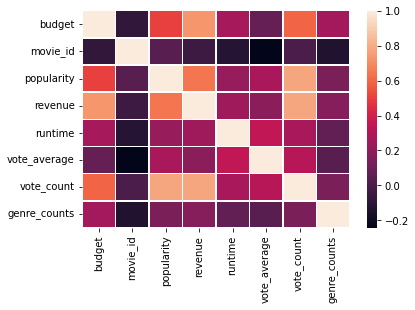

In [211]:
#Visualize the correlation between features
corr = tmdb_attributes_df.corr()
sns.heatmap(corr, linewidths=.5)

In [212]:
tmdb_attributes_df.sort_values('revenue', ascending=False)

,budget,movie_id,original_language,title,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,genres,genre_counts,genre_string
0,237000000,19995,en,Avatar,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[Action, Adventure, Fantasy, SciFi]",4,"Action, Adventure, Fantasy, SciFi"
25,200000000,597,en,Titanic,100.025899,11/18/97,1845034188,194.0,Nothing on Earth could come between them.,7.5,7562,"[Drama, Romance, Thriller]",3,"Drama, Romance, Thriller"
16,220000000,24428,en,The Avengers,144.448633,4/25/12,1519557910,143.0,Some assembly required.,7.4,11776,"[SciFi, Action, Adventure]",3,"SciFi, Action, Adventure"
28,150000000,135397,en,Jurassic World,418.708552,6/9/15,1513528810,124.0,The park is open.,6.5,8662,"[Action, Adventure, SciFi, Thriller]",4,"Action, Adventure, SciFi, Thriller"
44,190000000,168259,en,Furious 7,102.322217,4/1/15,1506249360,137.0,Vengeance Hits Home,7.3,4176,[Action],1,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732,0,47452,en,Love and Death on Long Island,0.933891,1/1/97,0,93.0,NaN,6.9,11,"[Drama, Romance, Foreign]",3,"Drama, Romance, Foreign"
3731,4200000,10947,en,High School Musical,16.536374,1/20/06,0,98.0,This School Rocks Like No Other!,6.1,1000,"[Comedy, Drama, Family, Music, TV Movie]",5,"Comedy, Drama, Family, Music, TV Movie"
3730,0,34069,de,Cargo,10.142218,9/24/09,0,120.0,NaN,5.9,140,"[Thriller, Mystery, SciFi]",3,"Thriller, Mystery, SciFi"
3729,3250000,26379,en,Paa,2.126139,12/4/09,0,133.0,NaN,6.6,19,"[Drama, Family, Foreign]",3,"Drama, Family, Foreign"


##Data Visualization

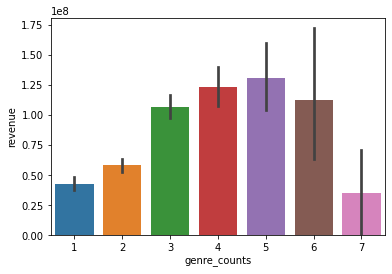

In [213]:
#Does more genres have any effect on revenue?

sns.barplot(data=tmdb_attributes_df, x='genre_counts', y='revenue')

It seems that the more genres a movie has, the more revenue it is generating. This is true up until 5 genres, after that, revenue starts to decline. This may be caused by confusion by watchers as what exactly is the genre of the movie they are watching.

Text(0, 0.5, 'Frequency')

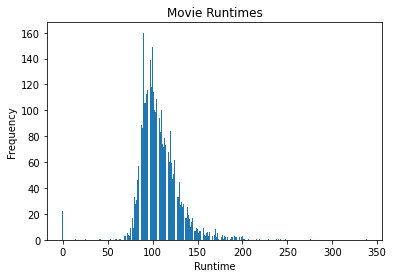

In [214]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = tmdb_attributes_df['runtime'].value_counts() 

# get x and y data 
runtime = data.index 
frequency = data.values 

# create bar chart 
ax.bar(runtime, frequency) 

# set title and labels 
ax.set_title('Movie Runtimes') 
ax.set_xlabel('Runtime') 
ax.set_ylabel('Frequency')

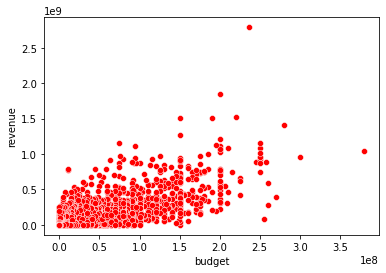

In [215]:
#Correlation between budget and Revenue
sns.scatterplot(data=tmdb_attributes_df, x='budget', y='revenue', color='red')

In [216]:
# .... insert more

## Machine Learning - Classification



###Import ML libraries.
###sklearn is the workhorse ML package in Python

In [217]:
# Import LabelEncoder for converting categorical variables into numerical (dummy) variables
from sklearn import preprocessing as prep

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [218]:
# tmdb_attributes_df.head()

,budget,movie_id,original_language,title,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,genres,genre_counts,genre_string
0,237000000,19995,en,Avatar,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[Action, Adventure, Fantasy, SciFi]",4,"Action, Adventure, Fantasy, SciFi"
1,300000000,285,en,Pirates of the Caribbean: At World's End,139.082615,5/19/07,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[Adventure, Fantasy, Action]",3,"Adventure, Fantasy, Action"
2,245000000,206647,en,Spectre,107.376788,10/26/15,880674609,148.0,A Plan No One Escapes,6.3,4466,"[Action, Adventure, Crime]",3,"Action, Adventure, Crime"
3,250000000,49026,en,The Dark Knight Rises,112.312950,7/16/12,1084939099,165.0,The Legend Ends,7.6,9106,"[Action, Crime, Drama, Thriller]",4,"Action, Crime, Drama, Thriller"
4,260000000,49529,en,John Carter,43.926995,3/7/12,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[Action, Adventure, SciFi]",3,"Action, Adventure, SciFi"


In [219]:
# tmdb_attributes_df['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [220]:
# #creating labelEncoder
# le = prep.LabelEncoder()

# # Converting categorical variables into numberic variables
# tmdb_attributes_df['original_language']=le.fit_transform(tmdb_attributes_df['original_language'])
# tmdb_attributes_df['genre_string']=le.fit_transform(tmdb_attributes_df['genre_string'])

In [221]:
# tmdb_attributes_df.head()

,budget,movie_id,original_language,title,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,genres,genre_counts,genre_string
0,237000000,19995,7,Avatar,150.437577,12/10/09,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[Action, Adventure, Fantasy, SciFi]",4,63
1,300000000,285,7,Pirates of the Caribbean: At World's End,139.082615,5/19/07,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[Adventure, Fantasy, Action]",3,331
2,245000000,206647,7,Spectre,107.376788,10/26/15,880674609,148.0,A Plan No One Escapes,6.3,4466,"[Action, Adventure, Crime]",3,32
3,250000000,49026,7,The Dark Knight Rises,112.312950,7/16/12,1084939099,165.0,The Legend Ends,7.6,9106,"[Action, Crime, Drama, Thriller]",4,134
4,260000000,49529,7,John Carter,43.926995,3/7/12,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[Action, Adventure, SciFi]",3,75


### Split the data into predictors and outcome

In [222]:
# X = tmdb_attributes_df[['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'genre_counts', 'genre_string']]
# X_labels = ['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'genre_counts', 'genre_string']
# y = tmdb_attributes_df['title']

### Split dataset into training set and test set

Note that here we are choosing 70% of the data to train the model and 30% of the data to test the model. Later on, you will see how changing this parameter affects the model performance.

In [223]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

### Build a Decision Tree Regression model

In [226]:
# #Create Decison Tree  Classifier
# dt = DecisionTreeClassifier()

# #Train the DT model 
# dt.fit(X_train, y_train)

# #Predict the outcome for Test data
# dt_y_pred = dt.predict(X_test)

In [227]:
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred))

# # Model Precision
# print("Precision:",metrics.precision_score(y_test, dt_y_pred))

# # Model Recall
# print("Recall:",metrics.recall_score(y_test, dt_y_pred))

# # Confusion matrix
# print("Confusion matrix:\n", metrics.confusion_matrix(y_test, dt_y_pred))

Accuracy: 0.0


ValueError: ignored